In [1]:
#libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#scikit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_csv("cleaned_data_v5.csv", encoding="Latin-1")

In [3]:
df.shape

(99492, 38)

In [4]:
df.columns

Index(['Unnamed: 0', 'race', 'gender', 'age', 'days_in_hospital',
       'num_lab_procedures', 'num_not_lab_procedures',
       'num_current_medications', 'num_outpatient_appointments',
       'num_previous_emergencies', 'num_inpatient_overnight_stays',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change_in_meds', 'diabates_med_prescribed',
       'readmitted'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
list_of_meds = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# renaming values in medicines
# change in dosage('dosage_increased', 'dosage_decreased') -> 1
# no change or not prescribed 'not_prescribed', no_change_dosage -> 0
new_values_meds = {"dosage_increased":3, "dosage_decreased":1 ,"no_change_dosage":2, "not_prescribed":0}
for medicine in list_of_meds:
    df[medicine] = df[medicine].replace(new_values_meds)

In [7]:
# renaming 'readmitted'
# readmitted ('>30', '<30') -> 1
# not readmitted  ('NO') -> 0
df.readmitted = df.readmitted.replace({'NO': 0, '>30': 2, '<30':1})

In [8]:
# renaming 'diabetes_med_prescribed'
# 'Yes' -> 1 
# 'No' -> 0
df = df.rename(columns={'diabates_med_prescribed': 'diabetes_med_prescribed'})
df.diabetes_med_prescribed = df.diabetes_med_prescribed.replace({'Yes': 1, 'No':0})

In [9]:
# renaming 'change_in_meds'
# 'Ch' -> 1
# 'No' -> 0
df.change_in_meds = df.change_in_meds.replace({'Ch': 1, 'No': 0})

In [10]:
#renaming 'age'
#[70-80) -> 70
#[60-70) -> 60
#[50-60) -> 90
#[80-90) -> 80
#[40-50) -> 40
#[30-40) -> 30
#[90-100) -> 90
#[20-30) -> 20
#[10-20) -> 10
#[0-10)-> 0
age_mapping = {'[70-80)': 70, '[60-70)': 60, '[50-60)':90, '[80-90)':80, '[40-50)': 40, '[30-40)': 30,'[90-100)': 90, '[20-30)': 20, '[10-20)': 10, '[0-10)': 0}
df.age = df.age.replace(age_mapping)

In [11]:
#before
print(df.race.value_counts())
print(df.gender.value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64
Female    53575
Male      45917
Name: gender, dtype: int64


In [12]:
#before
df.head()

,race,gender,age,days_in_hospital,num_lab_procedures,num_not_lab_procedures,num_current_medications,num_outpatient_appointments,num_previous_emergencies,num_inpatient_overnight_stays,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change_in_meds,diabetes_med_prescribed,readmitted
0,Caucasian,Female,0,1,41,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,10,3,59,0,18,0,0,0,...,0,3,0,0,0,0,0,1,1,2
2,AfricanAmerican,Female,20,2,11,5,13,2,0,1,...,0,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,30,2,44,1,16,0,0,0,...,0,3,0,0,0,0,0,1,1,0
4,Caucasian,Male,40,1,51,0,8,0,0,0,...,0,2,0,0,0,0,0,1,1,0


In [13]:
x = df.columns.values
le_gender = preprocessing.LabelEncoder()
le_race = preprocessing.LabelEncoder()
x_gender = le_gender.fit_transform(df.gender.values)
x_race = le_race.fit_transform(df.race.values)
df['gender'] = x_gender
df['race'] = x_race

In [14]:
#after
print(df.gender.value_counts())
print(df.race.value_counts())

0    53575
1    45917
Name: gender, dtype: int64
2    76099
0    19210
3     2037
4     1505
1      641
Name: race, dtype: int64


We can deduct that:
In race: Caucasian = 2, AfricanAmerican = 0, Hispanic = 3, Other = 4, 1 = Asian
In gender: Female = 0, Male = 1

In [15]:
#after
df.head()

,race,gender,age,days_in_hospital,num_lab_procedures,num_not_lab_procedures,num_current_medications,num_outpatient_appointments,num_previous_emergencies,num_inpatient_overnight_stays,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change_in_meds,diabetes_med_prescribed,readmitted
0,2,0,0,1,41,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,10,3,59,0,18,0,0,0,...,0,3,0,0,0,0,0,1,1,2
2,0,0,20,2,11,5,13,2,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2,1,30,2,44,1,16,0,0,0,...,0,3,0,0,0,0,0,1,1,0
4,2,1,40,1,51,0,8,0,0,0,...,0,2,0,0,0,0,0,1,1,0


In [ ]:
df.to_csv("cleaned_data_BN_v2.csv")

In [16]:
#separating samples from labels
samples = df.iloc[:,0:99492]
labels = df['readmitted']
print(samples.shape)

(99492, 37)


In [17]:
# dividing df in test data and training data
x_train, x_test, y_train, y_test = train_test_split(samples, labels, test_size=0.7, train_size= 0.3)
print(x_train.shape)
print(x_test.shape)

(29847, 37)
(69645, 37)


In [18]:
# try and experiemnt with test size

In [19]:
#normalisation

#scaling
scaler = preprocessing.MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)

#transforming
x_test_norm = scaler.transform(x_test)
print(x_train_norm)
print(x_test_norm)

[[0.5        0.         0.88888889 ... 0.         0.         0.        ]
 [0.5        0.         0.88888889 ... 0.         1.         1.        ]
 [0.5        1.         1.         ... 0.         1.         0.5       ]
 ...
 [0.         1.         0.66666667 ... 1.         1.         0.        ]
 [0.5        0.         0.77777778 ... 1.         1.         0.        ]
 [0.         0.         0.66666667 ... 1.         1.         0.5       ]]
[[0.5        0.         0.66666667 ... 0.         1.         0.        ]
 [0.         0.         0.33333333 ... 0.         0.         1.        ]
 [0.         0.         0.88888889 ... 0.         1.         0.        ]
 ...
 [0.5        1.         0.66666667 ... 0.         0.         0.        ]
 [0.5        0.         0.77777778 ... 1.         1.         1.        ]
 [0.5        1.         0.66666667 ... 1.         1.         0.        ]]


/Users/zara/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
#KNN modelling

for n_neighbours in [1, 5, 10, 15, 20, 25, 30]:
    knn = KNeighborsClassifier(n_neighbours)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print("N neighbours " + str(n_neighbours))
    print("Found vs Actual ")
    print(np.sum(y_test == y_pred), len(y_test))
    print("Accuracy score " + str(knn.score(x_test, y_test)))
    print("****************")
#example above taken from lab7 file 5.0

N neighbours 1
Found vs Actual 
45904 69645
Accuracy score 0.6591140785411731
****************
N neighbours 5
Found vs Actual 
49369 69645
Accuracy score 0.7088663938545481
****************
N neighbours 10
Found vs Actual 
50387 69645
Accuracy score 0.7234833799985642
****************
N neighbours 15
Found vs Actual 
50377 69645
Accuracy score 0.7233397946729844
****************
N neighbours 20
Found vs Actual 
50033 69645
Accuracy score 0.7184004594730419
****************
N neighbours 25
Found vs Actual 
49688 69645
Accuracy score 0.7134467657405413
****************
N neighbours 30
Found vs Actual 
49389 69645
Accuracy score 0.7091535645057075
****************


10 is the ideal number of neighbours, so we are finalising the model here

In [21]:
knn_2 = KNeighborsClassifier(n_neighbors=10)
knn_2.fit(x_train, y_train)
y_pred_2= knn.predict(x_test)
metrics.confusion_matrix(y_test, y_pred_2)

array([[36582,    13,   607],
       [ 6401,    46,  1394],
       [11792,    49, 12761]])

In [23]:
metrics.classification_report(y_test, y_pred_2)

'              precision    recall  f1-score   support\n\n           0       0.67      0.98      0.80     37202\n           1       0.43      0.01      0.01      7841\n           2       0.86      0.52      0.65     24602\n\n   micro avg       0.71      0.71      0.71     69645\n   macro avg       0.65      0.50      0.49     69645\nweighted avg       0.71      0.71      0.66     69645\n'

In [24]:
#cross-validation
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(samples, labels, test_size=0.5, train_size= 0.5)
print(KNeighborsClassifier(10).fit(x_train_2, y_train_2).score(x_test_2, y_test_2))
print(KNeighborsClassifier(10).fit(x_test_2, y_test_2).score(x_train_2, y_train_2))

0.7524424074297431
0.745728299762795


In [25]:
cross_val = cross_val_score(KNeighborsClassifier(10), samples, labels, cv=10)
cross_val.mean()

0.7762643672391528

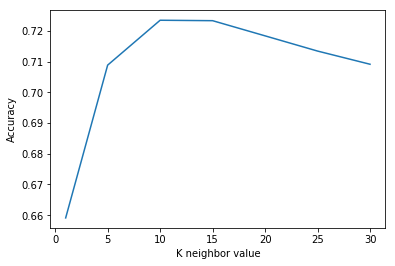

In [34]:
vals_to_print = {1: 0.6591140785411731, 5:0.7088663938545481,
        10: 0.7234833799985642,15: 0.7233397946729844,
        20: 0.7184004594730419, 25: 0.7134467657405413,
        30: 0.7091535645057075}

sorted_vals = sorted(vals_to_print.items())

neighbors, accuracy = zip(*sorted_vals) # unpack a list of pairs into two tuples

plt.plot(neighbors, accuracy)

plt.xlabel('K neighbor value')
plt.ylabel('Accuracy')

plt.show()
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356

Sources used:
- Sebastian Raschka, 2015. Python Machine Learning.
- Validation and Model Selection notebook from week 7
- https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn
- https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
- https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
- https://medium.com/30-days-of-machine-learning/day-3-k-nearest-neighbors-and-bias-variance-tradeoff-75f84d515bdb
- #https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356